# Model Evaluation on Pipelines
We stray away from .py files here so that we can evaluate each pipeline with some nice visualizations

In [1]:
from methods.process import Experiment
import matplotlib.pyplot as plt
experiment = Experiment()

[20:55:03:202] [Clean] Cleaning data...
[20:55:03:202] [Clean] Removing uppercase letters...
[20:55:04:840] [Clean] Removing punctuation...
[20:55:05:175] [Clean] Decoding HTML attributes...
[20:55:05:701] [Clean] Removing stopwords...
[20:55:13:623] [Reader] Splitting the dataframe into train/test sets...


In [2]:
# Setting the global N variable -> top N features
N = 20

# Setting the feature & coefficient extraction function:
def get_top_features(model, vectorizer, n_top_features=N):
    feature_names = vectorizer.get_feature_names_out()
    coefficients = model.coef_.flatten() if hasattr(model, 'coef_') else model.coef_[0]
    feature_coefficients = list(zip(feature_names, coefficients))
    sorted_features = sorted(feature_coefficients, key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:n_top_features]
    return top_features

# Setting the plotting function
def plot_top_features(top_features, model_name):
    top_feature_names, top_coefficients = zip(*top_features)

    # Create a bar chart to visualize the coefficients
    plt.figure(figsize=(10, 6))
    plt.barh(range(len(top_feature_names)), top_coefficients, align='center')
    plt.yticks(range(len(top_feature_names)), top_feature_names)
    plt.xlabel('Coefficient Value')
    plt.title(f'Top Features for {model_name}')
    plt.show()

## Logistic Regression

We load the pipeline from the `Experiment` class and extract the `feature_names` from the vectorizer + the `coefficients` from the model.

In [3]:
# This step usually takes around 7-8 minutes on my computer (nice coffee break)
logistic_pipeline = experiment.perform_single_experiment(
    pipeline_model='logistic',
    return_pipe=True,
)
logistic_vectorizer = logistic_pipeline.named_steps['vectorizer']
logistic_model = logistic_pipeline.named_steps['classifier']

[20:55:13:934] [Experiment] Existing pipeline found, loading "logistic_random-under"


In [4]:
logistic_top_features = get_top_features(logistic_model, logistic_vectorizer)
logistic_top_features

[('entp', 8.482318706477548),
 ('entps', 3.988317056405828),
 ('enfp', 3.805253597240085),
 ('entj', 2.982032922506406),
 ('estp', 2.40662136169037),
 ('trans', 2.332110244844663),
 ('shit', 2.0245717906379084),
 ('ne', 1.9911209732843052),
 ('man', 1.8933378158539875),
 ('argument', 1.8256732984681217),
 ('lmao', 1.7238735093379671),
 ('de', 1.5512962879992225),
 ('cis', 1.547817210427806),
 ('fuck', 1.5422372458935516),
 ('literally', 1.5248274535209256),
 ('dysphoria', 1.515096024088231),
 ('tbh', 1.5100721983499454),
 ('debate', 1.4795193376708398),
 ('enfps', 1.4672866523869044),
 ('det', 1.4285736908706654)]

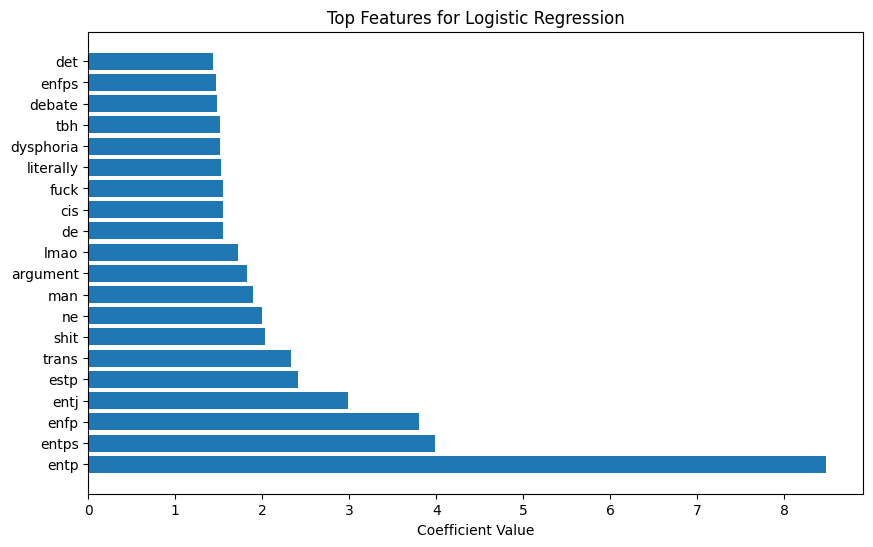

In [5]:
plot_top_features(logistic_top_features, model_name='Logistic Regression')

## LinearSVC

In [6]:
linear_svc_pipeline = experiment.perform_single_experiment(
    pipeline_model='svm',
    return_pipe=True,
    save_pipe=True
)
linear_svc_vectorizer = linear_svc_pipeline.named_steps['vectorizer']
linear_svc_model = linear_svc_pipeline.named_steps['classifier']

[20:56:11:999] [Experiment] Existing pipeline found, loading "svm_random-under"


In [7]:
linear_svc_top_features = get_top_features(linear_svc_model, linear_svc_vectorizer)
linear_svc_top_features

[('entp', 8.982823617534624),
 ('enfp', 4.125438471986699),
 ('entps', 4.0357656076170505),
 ('entj', 3.4718218610900897),
 ('estp', 2.5290714505766525),
 ('argument', 1.9037080636023485),
 ('trans', 1.8182876207242904),
 ('ne', 1.8179319563056593),
 ('shit', 1.7200511030256316),
 ('man', 1.7093571067888018),
 ('literally', 1.5823518869999231),
 ('fa', 1.570117986539073),
 ('yah', 1.5444446291260314),
 ('enfps', 1.5435077185132855),
 ('debate', 1.5296570416697126),
 ('da', 1.5154213640208998),
 ('7w8', 1.484013226751185),
 ('tbh', 1.4725922918812777),
 ('whole', 1.4583972562049128),
 ('funny', 1.4575752323694144)]

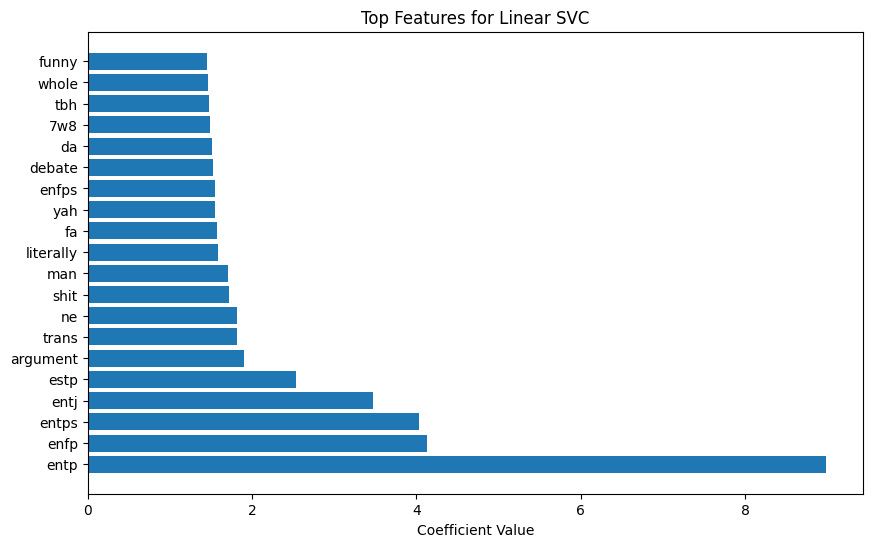

In [8]:
plot_top_features(linear_svc_top_features, model_name='Linear SVC')

## Naive Bayes

In [9]:
naive_bayes_pipeline = experiment.perform_single_experiment(
    pipeline_model='naive-bayes',
    return_pipe=True,
    save_pipe=True
)
nb_vectorizer = naive_bayes_pipeline.named_steps['vectorizer'].get_feature_names_out()
nb_model = naive_bayes_pipeline.named_steps['classifier'].feature_log_prob_[1]

[20:57:10:491] [Experiment] Existing pipeline found, loading "naive-bayes_random-under"


In [10]:
nb_top_features = sorted(list(zip(nb_vectorizer, nb_model)), key=lambda x: x[1], reverse=True)[:N]
nb_top_features

[('like', -7.967476043592434),
 ('one', -7.99962759115529),
 ('it', -8.013347655897753),
 ('people', -8.0184109578543),
 ('would', -8.027559878062526),
 ('that', -8.029671492723471),
 ('get', -8.031938896007636),
 ('think', -8.044732247467545),
 ('time', -8.057380881317306),
 ('even', -8.0614250616621),
 ('good', -8.072868089574554),
 ('know', -8.073498904924284),
 ('also', -8.07919422169534),
 ('way', -8.116861327154906),
 ('much', -8.123307097757463),
 ('really', -8.126296140168881),
 ('make', -8.130128520098955),
 ('see', -8.147813191514073),
 ('want', -8.150194955144265),
 ('you', -8.158060932774548)]

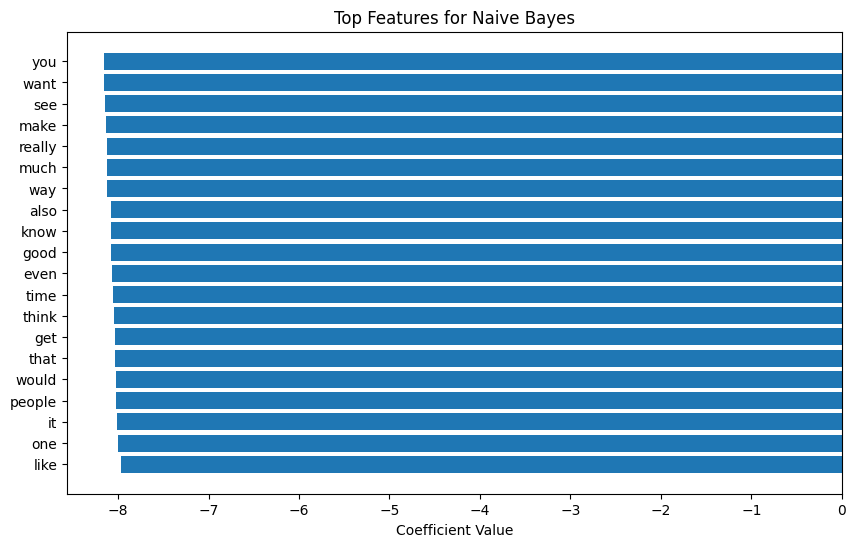

In [11]:
plot_top_features(nb_top_features, model_name='Naive Bayes')

## Checking the word embeddings on the FastText model

In [12]:
from methods.reader import Reader
reader = Reader('data/extrovert_introvert.csv')
X_train, y_train = reader.train[0], reader.train[1]
X_test, y_test = reader.test[0], reader.test[1]

[20:58:04:534] [Clean] Cleaning data...
[20:58:04:534] [Clean] Removing uppercase letters...
[20:58:06:104] [Clean] Removing punctuation...
[20:58:06:477] [Clean] Decoding HTML attributes...
[20:58:06:998] [Clean] Removing stopwords...
[20:58:14:836] [Reader] Splitting the dataframe into train/test sets...


In [13]:
from methods.fasttext_model import FastTextModel
fasttext_model = FastTextModel()
fasttext_model.fit(X_train, y_train)

FastTextModel()

In [14]:
fasttext_top_features = list(fasttext_model.get_word_weights(N=N).items())
fasttext_top_features

[('entp', 142.33777660079068),
 ('entj', 113.56389957433566),
 ('istp', 99.09576067340095),
 ('entps', 98.00278884614818),
 ('estp', 94.92525198752992),
 ('ubi', 87.37731549644377),
 ('enfp', 83.67981580249034),
 ('intj', 79.81362768460531),
 ('entp,', 78.48475496438914),
 ('anpan', 76.1960818945081),
 ('infj', 75.48157414188609),
 ('intjs', 63.66290796431713),
 ('(●ᗜ●)つ🍪', 62.378344217082486),
 ('🫀', 62.20752345303481),
 ('infjs', 61.71031049999874),
 ('infp', 59.43256438046228),
 ('😹', 56.034364077378996),
 ('yah,', 55.87562025850639),
 ('wosh', 55.189732004189864),
 ('~', 54.75245626785909)]

C:\Users\atabekis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 5596 (\N{CANADIAN SYLLABICS CARRIER THU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\atabekis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12388 (\N{HIRAGANA LETTER TU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\atabekis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 127850 (\N{COOKIE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\atabekis\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 129728 (\N{ANATOMICAL HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


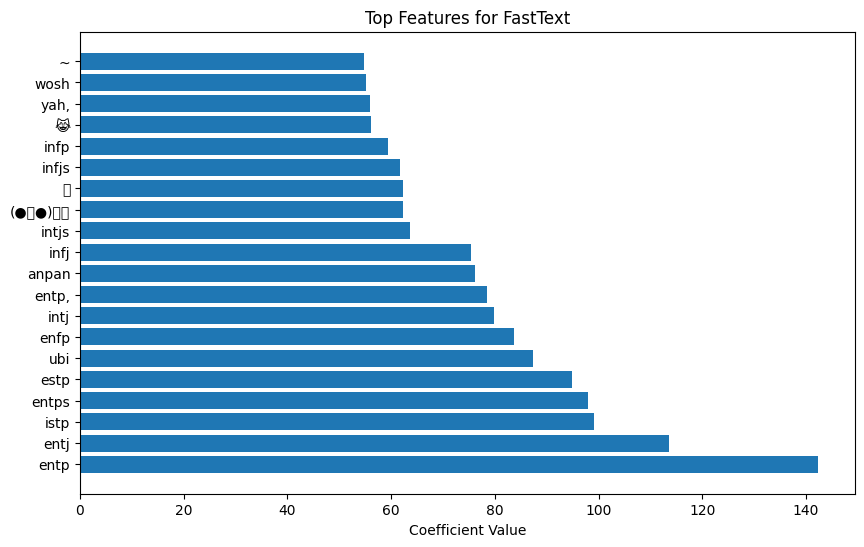

In [15]:
plot_top_features(fasttext_top_features, model_name='FastText')

In [23]:
import pandas as pd
df_top_features = pd.DataFrame()
df_top_features['MNB'] = [text[0] for text in nb_top_features]
df_top_features['L-SVC'] = [text[0] for text in linear_svc_top_features]
df_top_features['LR'] = [text[0] for text in logistic_top_features]
df_top_features['FastText'] = [text[0] for text in fasttext_top_features]
df_top_features = df_top_features.iloc[:10]
df_top_features

,MNB,L-SVC,LR,FastText
0,like,entp,entp,entp
1,one,enfp,entps,entj
2,it,entps,enfp,istp
3,people,entj,entj,entps
4,would,estp,estp,estp
5,that,argument,trans,ubi
6,get,trans,shit,enfp
7,think,ne,ne,intj
8,time,shit,man,"entp,"
9,even,man,argument,anpan


In [26]:
df_top_features = df_top_features.set_index(pd.RangeIndex(start=1, stop=len(df_top_features) + 1))
df_top_features.to_latex('methods/output/models_top_features.tex', index=True)

In [48]:
model.predict(['Hi im ata, im a very introverted person but i like to mention the word entp'])

[1]